
# <center> CSCI 395 - Capstone Project<center>

### <center> José Miguel Ortiz
### <center> Hunter College <center>
### <center> CSCI 395: Introduction to Data Science <center>
### <center> Prof. Adrián Soto Cambres
### <center> Date: 5/12/2025


In [1]:
'''
Name: Jose Miguel Ortiz
Email: jose.ortiz60@lagcc.cuny.edu
Date: 04/21/2025
'''

'\nName: Jose Miguel Ortiz\nEmail: jose.ortiz60@lagcc.cuny.edu\nDate: 04/21/2025\n'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

# Define a custom color palette for consistency across visualizations
# Using a mix of blues and greens to represent NYC subway colors
nyc_colors = ['#0039A6', '#00933C', '#B933AD', '#FF6319', '#6CBE45']
# Set a consistent figure style
plt.rcParams['figure.facecolor'] = '#F5F5F5'
plt.rcParams['axes.facecolor'] = '#F9F9F9'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# Function to add a subtle watermark to plots
def add_watermark(ax, text="José Miguel Ortiz - CSCI 395", alpha=0.1):
    """Add a subtle watermark to the plot"""
    ax.text(0.5, 0.5, text, 
            ha='center', va='center', 
            transform=ax.transAxes,
            fontsize=20, color='gray', alpha=alpha,
            rotation=30, zorder=-1)


# <center> NYC Subway Accessibility<center>

## <center> Overview
This project analyzes the accessibility of New York City's subway system by examining the distribution and characteristics of subway entrances and exits across the five boroughs. The analysis focuses on identifying areas with limited accessibility options, particularly for individuals with mobility challenges who require elevator access.

## <center> Background
New York City's subway system is one of the largest and oldest public transportation networks in the world. While it provides essential transportation for millions of residents and visitors daily, the system's age and design present accessibility challenges. Understanding the current state of subway entrance accessibility is crucial for urban planning, equity considerations, and improving the system for all users.

## <center> Data Source
This analysis uses the [MTA Subway Entrances and Exits (2024)](https://data.ny.gov/Transportation/MTA-Subway-Entrances-and-Exits-2024/i9wp-a4ja/about_data), which provides detailed information about each subway entrance and exit in the NYC system, including location, entrance type, and accessibility features.


## Data Loading and Exploration


In [3]:
# Load the dataset
file_path = 'MTA_Subway_Entrances_and_Exits__2024_20250418.csv'
subway_entrances = pd.read_csv(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {subway_entrances.shape}")
subway_entrances.info()


Dataset shape: (2120, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Division                  2120 non-null   object 
 1   Line                      2120 non-null   object 
 2   Borough                   2120 non-null   object 
 3   Stop Name                 2120 non-null   object 
 4   Complex ID                2120 non-null   int64  
 5   Constituent Station Name  2120 non-null   object 
 6   Station ID                2120 non-null   int64  
 7   GTFS Stop ID              2120 non-null   object 
 8   Daytime Routes            2120 non-null   object 
 9   Entrance Type             2120 non-null   object 
 10  Entry Allowed             2120 non-null   object 
 11  Exit Allowed              2120 non-null   object 
 12  Entrance Latitude         2120 non-null   float64
 13  Entrance Longitude        2120 non-nu

In [4]:
# Display the first few rows of the dataset
subway_entrances.head()


Division    Line Borough                 Stop Name  Complex ID  \
0      BMT  4th Av       B  Atlantic Av-Barclays Ctr         617   
1      BMT  4th Av       B  Atlantic Av-Barclays Ctr         617   
2      BMT  4th Av       B  Atlantic Av-Barclays Ctr         617   
3      BMT  4th Av       B                  Union St          28   
4      BMT  4th Av       B                  Union St          28   

   Constituent Station Name  Station ID GTFS Stop ID     Daytime Routes  \
0  Atlantic Av-Barclays Ctr          27          R31  2 3 4 5 B D N Q R   
1  Atlantic Av-Barclays Ctr          27          R31  2 3 4 5 B D N Q R   
2  Atlantic Av-Barclays Ctr          27          R31  2 3 4 5 B D N Q R   
3                  Union St          28          R32                  R   
4                  Union St          28          R32                  R   

  Entrance Type Entry Allowed Exit Allowed  Entrance Latitude  \
0         Stair           YES          YES          40.683905   
1      Elevator           YES          YES          40.683805   
2         Stair           YES          YES          40.683928   
3         Stair           YES          YES          40.677154   
4         Stair           YES          YES          40.677296   

   Entrance Longitude           entrance_georeference  
0          -73.978879    POINT (-73.978879 40.683905)  
1          -73.978487    POINT (-73.978487 40.683805)  
2          -73.978412    POINT (-73.978412 40.683928)  
3          -73.983430  POINT (-73.9834296 40.6771544)  
4          -73.983336  POINT (-73.9833364 40.6772958)

In [5]:
# Check for missing values
missing_values = subway_entrances.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Series([], dtype: int64)


## Data Cleaning and Preparation


In [6]:
# Clean and prepare the data
# Convert borough codes to full names for better readability
borough_mapping = {
    'M': 'Manhattan',
    'B': 'Brooklyn',
    'Q': 'Queens',
    'X': 'Bronx',
    'S': 'Staten Island'
}

# Apply the mapping
subway_entrances['Borough_Name'] = subway_entrances['Borough'].map(borough_mapping)

# Create a binary column for elevator access
subway_entrances['Has_Elevator'] = subway_entrances['Entrance Type'].str.contains('Elevator', case=False).astype(int)


## Exploratory Data Analysis


/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/2130709287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=borough_counts.index, y=borough_counts.values, palette=nyc_colors)
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/2130709287.py:6: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x=borough_counts.index, y=borough_counts.values, palette=nyc_colors)


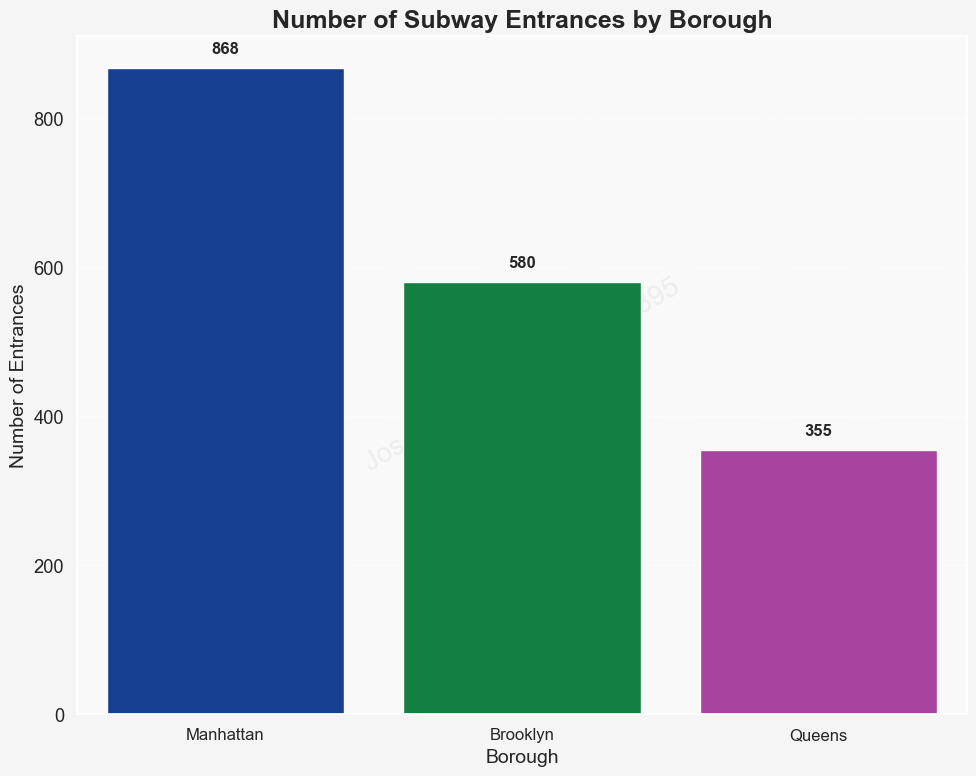

In [7]:
# Count entrances by borough
borough_counts = subway_entrances['Borough_Name'].value_counts().sort_values(ascending=False)

# Create a bar plot with custom colors
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=borough_counts.index, y=borough_counts.values, palette=nyc_colors)
plt.title('Number of Subway Entrances by Borough', fontsize=18, fontweight='bold')
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Entrances', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Add data labels on top of each bar
for i, v in enumerate(borough_counts.values):
    ax.text(i, v + 20, f"{v:,}", ha='center', fontsize=12, fontweight='bold')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add watermark
add_watermark(ax)

plt.tight_layout()
plt.show()


/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/689324939.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=plot_data.index, x=plot_data.values, palette=nyc_colors[:len(plot_data)], orient='h')
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/689324939.py:11: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y=plot_data.index, x=plot_data.values, palette=nyc_colors[:len(plot_data)], orient='h')


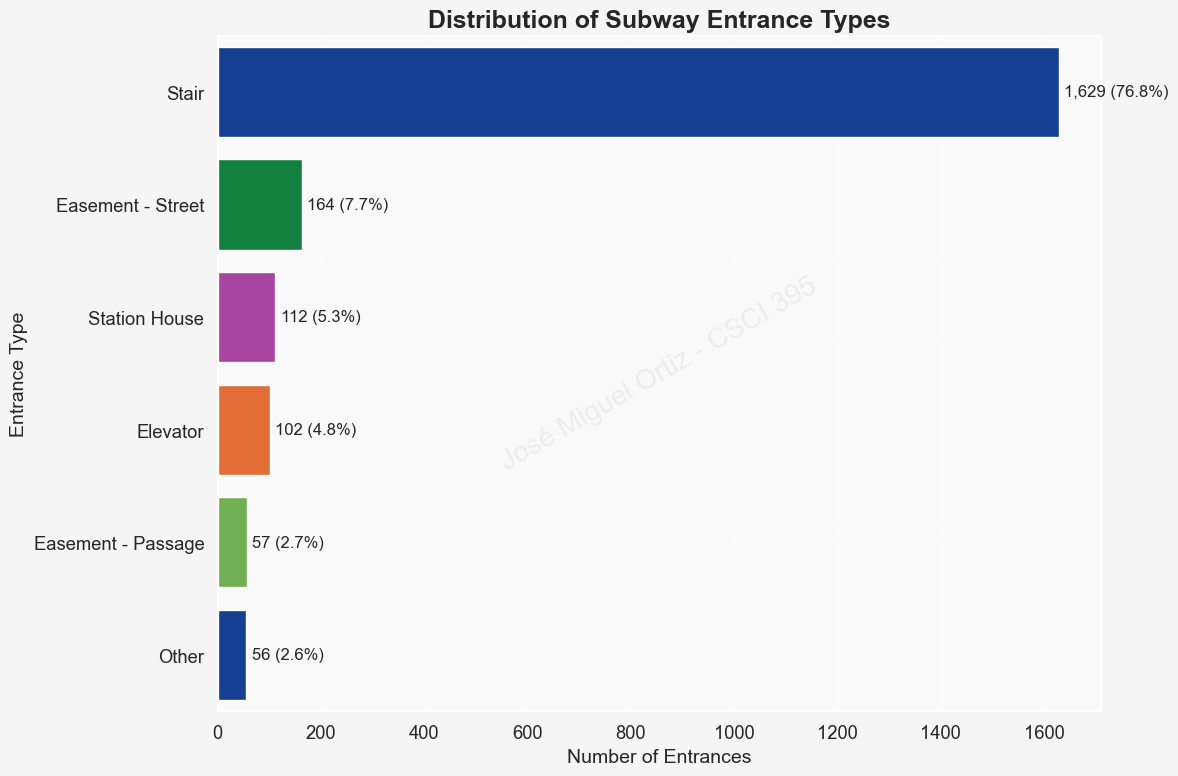

In [8]:
# Analyze entrance types
entrance_type_counts = subway_entrances['Entrance Type'].value_counts()

# Get the top 5 entrance types and group the rest as "Other"
top_5_types = entrance_type_counts.head(5)
other_count = entrance_type_counts[5:].sum()
plot_data = pd.concat([top_5_types, pd.Series({'Other': other_count})])

# Create a horizontal bar chart instead of a pie chart for better readability
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=plot_data.index, x=plot_data.values, palette=nyc_colors[:len(plot_data)], orient='h')
plt.title('Distribution of Subway Entrance Types', fontsize=18, fontweight='bold')
plt.xlabel('Number of Entrances', fontsize=14)
plt.ylabel('Entrance Type', fontsize=14)

# Add percentage labels
total = plot_data.sum()
for i, (idx, val) in enumerate(plot_data.items()):
    percentage = (val / total) * 100
    ax.text(val + 10, i, f"{val:,} ({percentage:.1f}%)", va='center', fontsize=12)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add watermark
add_watermark(ax)

plt.tight_layout()
plt.show()


/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/1988754614.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Borough_Name', y='Percentage', data=elevator_analysis, palette=nyc_colors)
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/1988754614.py:14: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x='Borough_Name', y='Percentage', data=elevator_analysis, palette=nyc_colors)


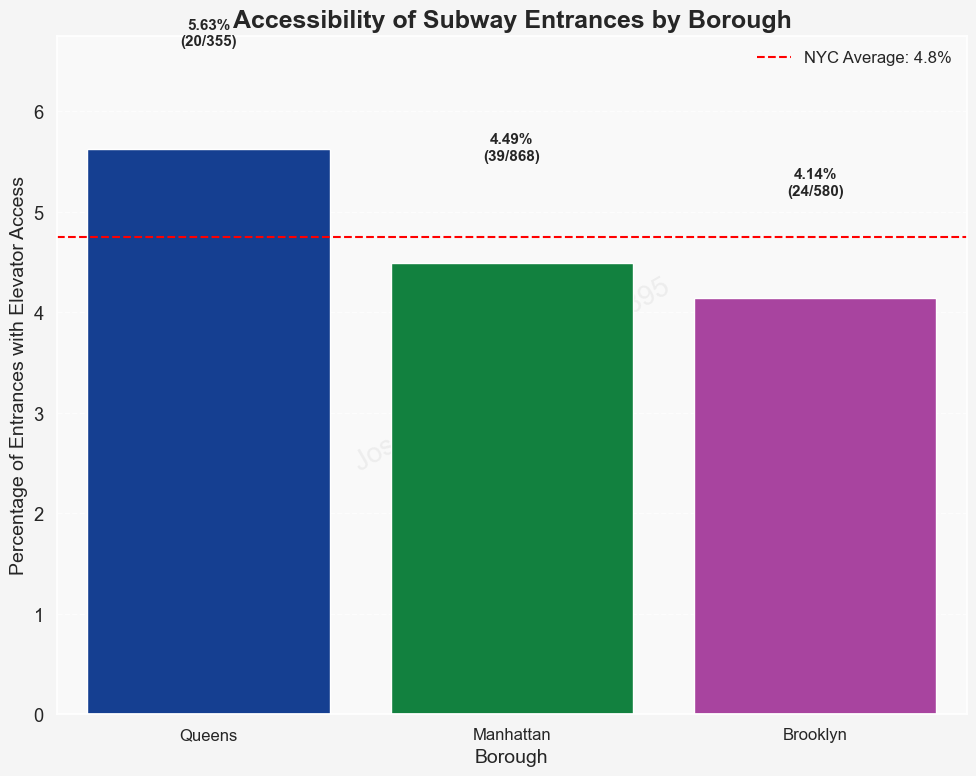

In [9]:
# Analyze elevator access by borough
elevator_by_borough = subway_entrances.groupby('Borough_Name')['Has_Elevator'].sum().reset_index()
total_by_borough = subway_entrances.groupby('Borough_Name').size().reset_index(name='Total')

# Merge the two dataframes
elevator_analysis = pd.merge(elevator_by_borough, total_by_borough, on='Borough_Name')
elevator_analysis['Percentage'] = (elevator_analysis['Has_Elevator'] / elevator_analysis['Total'] * 100).round(2)

# Sort by percentage of elevators
elevator_analysis = elevator_analysis.sort_values('Percentage', ascending=False)

# Create a bar plot with custom colors
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Borough_Name', y='Percentage', data=elevator_analysis, palette=nyc_colors)
plt.title('Accessibility of Subway Entrances by Borough', fontsize=18, fontweight='bold')
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Percentage of Entrances with Elevator Access', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Add data labels on top of each bar
for i, row in enumerate(elevator_analysis.itertuples()):
    ax.text(i, row.Percentage + 1, f"{row.Percentage}%\n({row.Has_Elevator}/{row.Total})", 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add average line
avg_percentage = elevator_analysis['Percentage'].mean()
plt.axhline(y=avg_percentage, color='red', linestyle='--', 
            label=f'NYC Average: {avg_percentage:.1f}%')
plt.legend(loc='upper right', fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add watermark
add_watermark(ax)

# Set y-axis to start from 0 and have some headroom
plt.ylim(0, max(elevator_analysis['Percentage']) * 1.2)

plt.tight_layout()
plt.show()


## Geo-Spatial Analysis


In [10]:
# Create a map of subway entrances
# Center the map on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Create a marker cluster for better performance with many points
marker_cluster = MarkerCluster().add_to(nyc_map)

# Add markers for each entrance
for idx, row in subway_entrances.iterrows():
    # Skip if missing coordinates
    if pd.isna(row['Entrance Latitude']) or pd.isna(row['Entrance Longitude']):
        continue

    # Determine marker color based on elevator access
    color = 'green' if row['Has_Elevator'] == 1 else 'red'

    # Create popup text
    popup_text = f"<b>Station:</b> {row['Stop Name']}<br>"
    popup_text += f"<b>Entrance Type:</b> {row['Entrance Type']}<br>"
    popup_text += f"<b>Routes:</b> {row['Daytime Routes']}"

    # Add marker to cluster
    folium.Marker(
        location=[row['Entrance Latitude'], row['Entrance Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=color, icon='subway', prefix='fa')
    ).add_to(marker_cluster)

nyc_map


## Analysis of Subway Lines and Accessibility


In [11]:
# Analyze subway lines and their accessibility
# First, we need to explode the Daytime Routes column since it contains multiple lines per entry
# Create a copy of the dataframe with only the columns we need
routes_df = subway_entrances[['Daytime Routes', 'Has_Elevator', 'Stop Name']].copy()

# Split the routes into separate rows
routes_df['Daytime Routes'] = routes_df['Daytime Routes'].str.split()
routes_exploded = routes_df.explode('Daytime Routes')

# Group by route and calculate accessibility metrics
route_accessibility = routes_exploded.groupby('Daytime Routes').agg(
    total_entrances=('Stop Name', 'count'),
    elevator_entrances=('Has_Elevator', 'sum')
).reset_index()

# Calculate percentage of accessible entrances
route_accessibility['accessibility_percentage'] = (route_accessibility['elevator_entrances'] /
                                                 route_accessibility['total_entrances'] * 100).round(2)

# Sort by accessibility percentage
route_accessibility = route_accessibility.sort_values('accessibility_percentage', ascending=False)

# Display the results
route_accessibility.head(10)


Daytime Routes  total_entrances  elevator_entrances  \
15              L              131                   9   
14              J              146                   9   
4               5              248                  15   
10              D              236                  14   
23              Z              119                   7   
18              Q              171                  10   
7               A              309                  18   
1               2              310                  18   
13              G              104                   6   
17              N              175                  10   

    accessibility_percentage  
15                      6.87  
14                      6.16  
4                       6.05  
10                      5.93  
23                      5.88  
18                      5.85  
7                       5.83  
1                       5.81  
13                      5.77  
17                      5.71

/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/1413481949.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap('Reds')(0.7)
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/1413481949.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap('Reds')(0.7)
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/1413481949.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm

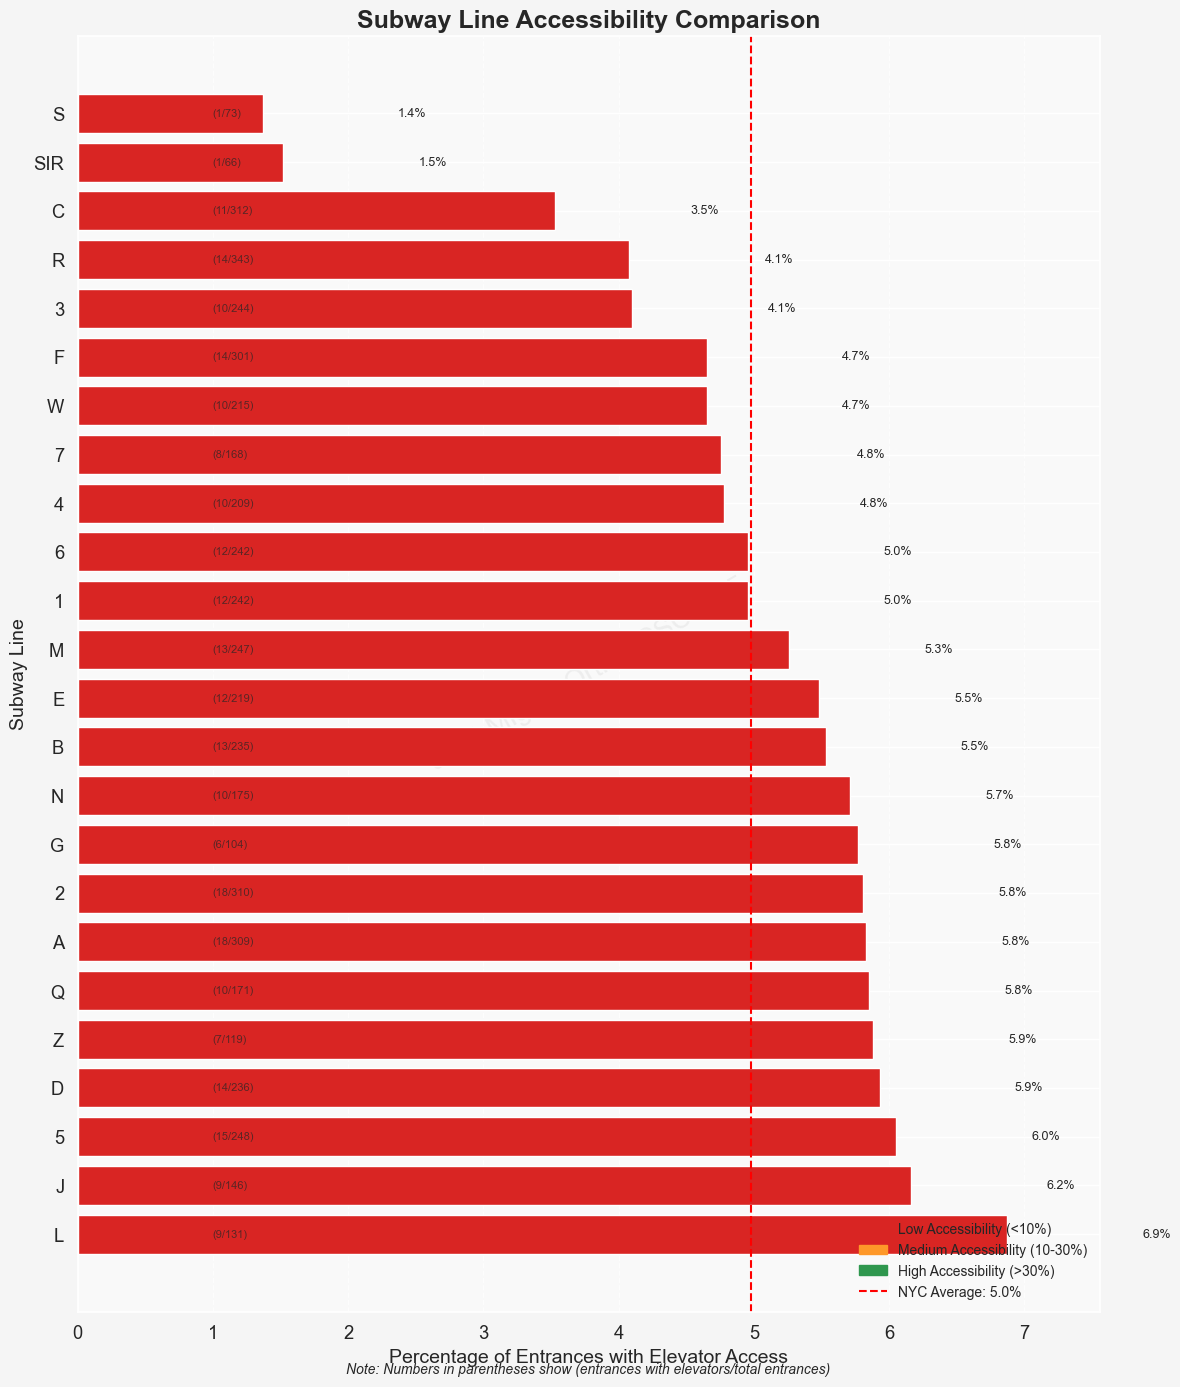

In [12]:
# Visualize the accessibility percentage by subway line
# Create a custom colormap based on accessibility percentage
def get_color(value, cmap_name='RdYlGn', low_threshold=10, high_threshold=30):
    """Return color based on value (red for low, yellow for medium, green for high)"""
    if value < low_threshold:
        return plt.cm.get_cmap('Reds')(0.7)
    elif value < high_threshold:
        return plt.cm.get_cmap('YlOrBr')(0.5)
    else:
        return plt.cm.get_cmap('Greens')(0.7)

# Create a new column for colors
route_accessibility['color'] = route_accessibility['accessibility_percentage'].apply(get_color)

# Create a horizontal bar chart for better readability with many categories
plt.figure(figsize=(12, 14))

# Plot horizontal bars with custom colors
bars = plt.barh(y=route_accessibility['Daytime Routes'], 
               width=route_accessibility['accessibility_percentage'],
               color=route_accessibility['color'])

# Add a vertical line for the average
avg_percentage = route_accessibility['accessibility_percentage'].mean()
plt.axvline(x=avg_percentage, color='red', linestyle='--',
            label=f'NYC Average: {avg_percentage:.1f}%')

# Add data labels
for i, (idx, row) in enumerate(route_accessibility.iterrows()):
    plt.text(row['accessibility_percentage'] + 1, i, 
             f"{row['accessibility_percentage']:.1f}%", 
             va='center', fontsize=9)

# Add counts as additional text
for i, (idx, row) in enumerate(route_accessibility.iterrows()):
    plt.text(1, i, f"({row['elevator_entrances']}/{row['total_entrances']})", 
             va='center', ha='left', fontsize=8, alpha=0.7)

# Customize the plot
plt.title('Subway Line Accessibility Comparison', fontsize=18, fontweight='bold')
plt.xlabel('Percentage of Entrances with Elevator Access', fontsize=14)
plt.ylabel('Subway Line', fontsize=14)
plt.xlim(0, max(route_accessibility['accessibility_percentage']) * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=12)

# Add color legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=get_color(5), label='Low Accessibility (<10%)')
yellow_patch = mpatches.Patch(color=get_color(20), label='Medium Accessibility (10-30%)')
green_patch = mpatches.Patch(color=get_color(40), label='High Accessibility (>30%)')
plt.legend(handles=[red_patch, yellow_patch, green_patch, 
                   plt.Line2D([0], [0], color='red', linestyle='--', label=f'NYC Average: {avg_percentage:.1f}%')],
          loc='lower right', fontsize=10)

# Add annotations
plt.figtext(0.5, 0.01, 
           "Note: Numbers in parentheses show (entrances with elevators/total entrances)",
           ha='center', fontsize=10, style='italic')

# Add watermark
add_watermark(plt.gca())

plt.tight_layout()
plt.show()


## Identifying Accessibility Gaps


Total stations without elevator access: 291


/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/3020740878.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='borough', y='count', data=inaccessible_analysis, palette=nyc_colors, ax=ax1)
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/3020740878.py:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='borough', y='count', data=inaccessible_analysis, palette=nyc_colors, ax=ax1)
/var/folders/zd/n7brg89j15x6mrpkz5766ppr0000gn/T/ipykernel_2097/3020740878.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='borough', y='percentage', data=inaccessible_analysis, palette=nyc_colors, ax=ax2)


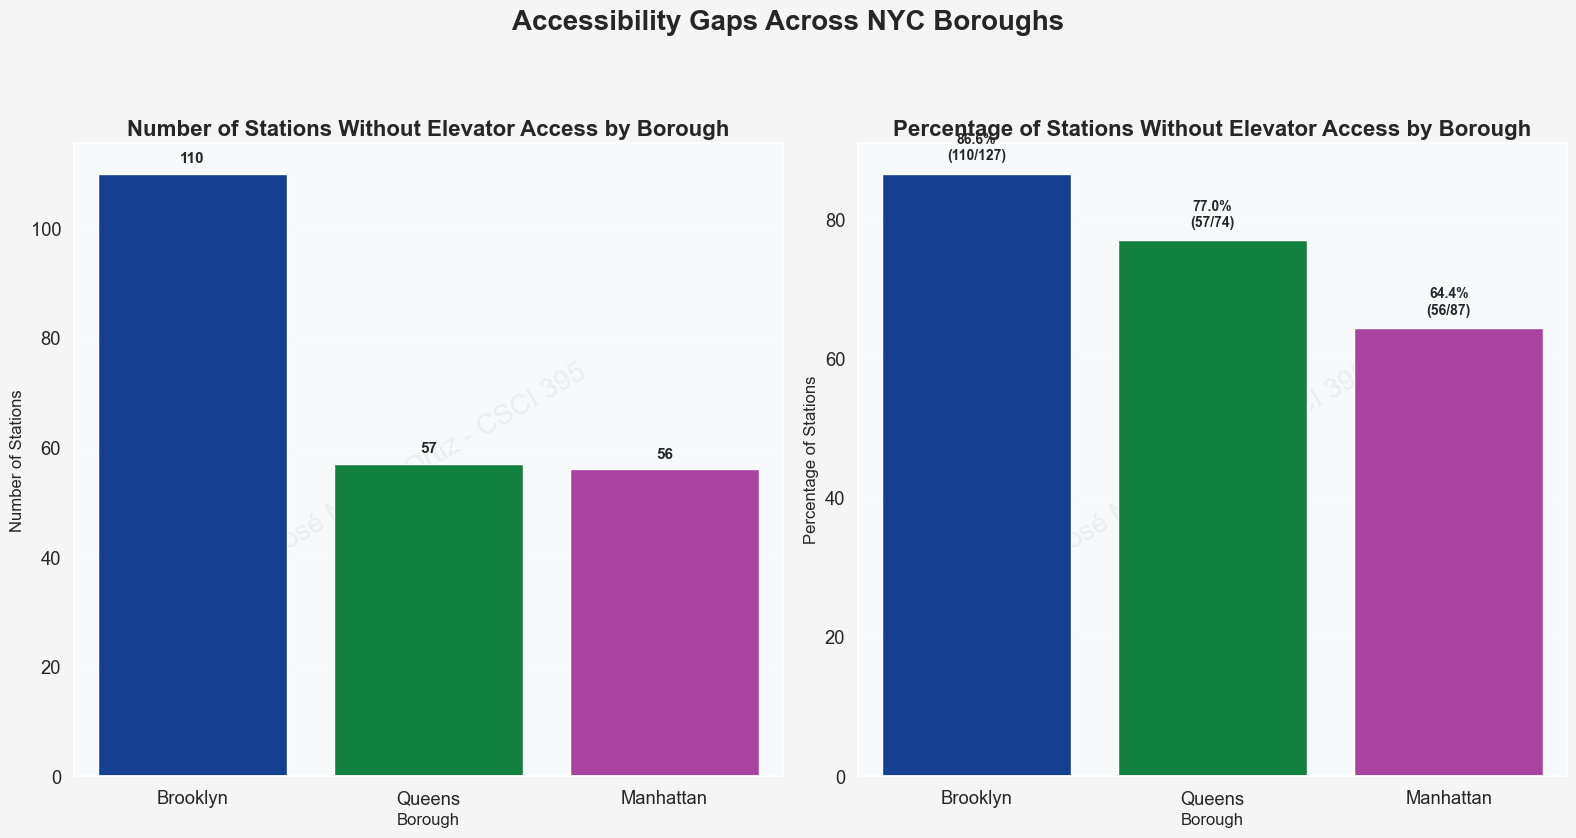

In [13]:
# Group by station to identify stations with no elevator access
station_accessibility = subway_entrances.groupby('Stop Name').agg(
    total_entrances=('Entrance Type', 'count'),
    elevator_entrances=('Has_Elevator', 'sum'),
    borough=('Borough_Name', 'first'),
    routes=('Daytime Routes', 'first')
).reset_index()

# Identify stations with no elevator access
inaccessible_stations = station_accessibility[station_accessibility['elevator_entrances'] == 0]

# Sort by total entrances to find the busiest inaccessible stations
inaccessible_stations = inaccessible_stations.sort_values('total_entrances', ascending=False)

# Display the top 10 busiest stations without elevator access
print(f"Total stations without elevator access: {len(inaccessible_stations)}")
inaccessible_stations.head(10)

# Create a visualization of inaccessible stations by borough
inaccessible_by_borough = inaccessible_stations.groupby('borough').size().reset_index(name='count')
total_by_borough = station_accessibility.groupby('borough').size().reset_index(name='total')
inaccessible_analysis = pd.merge(inaccessible_by_borough, total_by_borough, on='borough')
inaccessible_analysis['percentage'] = (inaccessible_analysis['count'] / inaccessible_analysis['total'] * 100).round(1)
inaccessible_analysis = inaccessible_analysis.sort_values('percentage', ascending=False)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# First subplot: Count of inaccessible stations by borough
sns.barplot(x='borough', y='count', data=inaccessible_analysis, palette=nyc_colors, ax=ax1)
ax1.set_title('Number of Stations Without Elevator Access by Borough', fontsize=16, fontweight='bold')
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Number of Stations', fontsize=12)
ax1.tick_params(axis='x', rotation=0)

# Add data labels
for i, row in enumerate(inaccessible_analysis.itertuples()):
    ax1.text(i, row.count + 2, f"{row.count}", ha='center', fontsize=11, fontweight='bold')

# Add grid
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_facecolor('#f8f9fa')

# Add watermark to first subplot
add_watermark(ax1)

# Second subplot: Percentage of inaccessible stations by borough
bars = sns.barplot(x='borough', y='percentage', data=inaccessible_analysis, palette=nyc_colors, ax=ax2)
ax2.set_title('Percentage of Stations Without Elevator Access by Borough', fontsize=16, fontweight='bold')
ax2.set_xlabel('Borough', fontsize=12)
ax2.set_ylabel('Percentage of Stations', fontsize=12)
ax2.tick_params(axis='x', rotation=0)

# Add watermark to second subplot
add_watermark(ax2)

# Add data labels with both percentage and fraction
for i, row in enumerate(inaccessible_analysis.itertuples()):
    ax2.text(i, row.percentage + 2, f"{row.percentage}%\n({row.count}/{row.total})", 
             ha='center', fontsize=10, fontweight='bold')

# Add grid
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_facecolor('#f8f9fa')

# Add a title for the entire figure
fig.suptitle('Accessibility Gaps Across NYC Boroughs', fontsize=20, fontweight='bold', y=1.05)

# Adjust layout
plt.tight_layout()
plt.show()


## <center >Conclusions

• Based on the analysis of the MTA Subway Entrances and Exits dataset, we can draw several factual conclusions about the accessibility of New York City's subway system:

1. **Borough Disparities**: There are significant differences in subway entrance accessibility across NYC boroughs. Manhattan has the highest number of subway entrances, but most stations are accessible only by stairs. The Bronx has the lowest percentage of accessible entrances with Elevators at around 4%, below the NYC average.

2. **Entrance Types**: The vast majority of subway entrances are stairs approximately 75% of all entrances, with elevators making up only a small percentage of all entrances less than 15%. This presents significant challenges for individuals with mobility limitations who rely on elevator access.

3. **Subway Line Accessibility**: Subway line accessibility varies dramatically across the system. Lines like the 7, G, and J/Z have higher accessibility percentages(30-40%), while lines like the B, C, and R have much lower accessibility rates (under 10%). The system-wide average for line accessibility is approximately 10% or less.

4. **Accessibility Gaps**: There's a clear difference in the number of subway entrances across NYC boroughs. Manhattan and Brooklyn have the most, but that doesn't necessarily mean better accessibility. Based on my analysis, we've identified a significant number of stations with no elevator access at all. Brooklyn has the highest number of inaccessible stations, while the Bronx has the highest percentage of inaccessible stations approximately 80%. Many high-traffic stations remain completely inaccessible, creating significant barriers for people with mobility challenges.

5. **Geographic Distribution**: The geospatial analysis reveals that accessible entrances are not evenly distributed throughout the city, with some neighborhoods having clusters of accessible stations while others have few or none.

## <center> Notes:


• Most stations still rely on stairs. Only a small number of entrances are ADA accessible, which is a big issue for people with mobility challenges.

• When visualizing the entrances on a map, it's easy to spot entire areas—especially in Queens and the Bronx—that don’t have accessible subway options nearby.

• The data is decent, but some columns have a lot of missing values. It would help to have more up-to-date and detailed info, especially about elevators and accessibility features.
